In [33]:
import sys
sys.path.append('../..')  # Adjust the path to include the parent directory

import pandas as pd
import os
import numpy as np
import canopus
from plotnine import *
from scipy.stats import gmean
import matplotlib.pyplot as plt
from natsort import natsorted
import pytket.qasm
from qiskit import QuantumCircuit, qasm2
import warnings
warnings.filterwarnings("ignore")

### Benchmark info

In [34]:
benchmark_table = pd.DataFrame()
cx_cost_est = canopus.SynthCostEstimator('cx')
fnames = [os.path.join('../output/logical/tk2/', fname) for fname in natsorted(os.listdir('../output/logical/tk2/'))]
for fname in fnames:
    circ = pytket.qasm.circuit_from_qasm(fname)
    qc = canopus.utils.tket_to_qiskit(circ)
    count_cost, depth_cost = cx_cost_est.eval_circuit_cost(qc)

    benchmark_table = pd.concat([benchmark_table, pd.DataFrame({
        "Program": os.path.basename(fname).split('.')[0].split('_')[0],
        "#Qubit": qc.num_qubits,
        "#Can": qc.num_nonlocal_gates(),
        "Depth2Q": qc.depth(lambda instr: instr.operation.num_qubits > 1),
        "C (count)": count_cost,
        "C (depth)": depth_cost
    }, index=[0])], ignore_index=True)

In [35]:
benchmark_table


,Program,#Qubit,#Can,Depth2Q,C (count),C (depth)
0,bigadder,18,114,79,130.0,88.0
1,bv,19,18,18,18.0,18.0
2,gcm,13,377,376,511.0,510.0
3,ising,26,25,2,50.0,4.0
4,knn,25,72,50,84.0,62.0
5,multiplier,15,198,122,222.0,133.0
6,qec9xz,17,32,12,32.0,12.0
7,qft,18,153,33,306.0,66.0
8,qpeexact,16,127,43,260.0,86.0
9,qram,20,110,70,130.0,78.0


In [36]:
benchmark_table.to_latex('benchmark_table.tex', 
                         index=False, escape=False, 
                         float_format='%.1f', column_format='|l|r|r|r|r|r|')

### Detailed routing results

#### Routing overhead $C_{\mathrm{count}}$ and $C_{\mathrm{depth}}$

In [37]:
result_sabre_chain_count = pd.read_csv('../results/sabre-chain-count.csv')
result_canopus_chain_count = pd.read_csv('../results/canopus-chain-count.csv')
result_toqm_chain_count = pd.read_csv('../results/toqm-chain-count.csv')
result_bqskit_chain_count = pd.read_csv('../results/bqskit-chain-count.csv')

result_sabre_hhex_count = pd.read_csv('../results/sabre-hhex-count.csv')
result_canopus_hhex_count = pd.read_csv('../results/canopus-hhex-count.csv')
result_toqm_hhex_count = pd.read_csv('../results/toqm-hhex-count.csv')
result_bqskit_hhex_count = pd.read_csv('../results/bqskit-hhex-count.csv')

result_sabre_square_count = pd.read_csv('../results/sabre-square-count.csv')
result_canopus_square_count = pd.read_csv('../results/canopus-square-count.csv')
result_toqm_square_count = pd.read_csv('../results/toqm-square-count.csv')
result_bqskit_square_count = pd.read_csv('../results/bqskit-square-count.csv')


result_sabre_chain_depth = pd.read_csv('../results/sabre-chain-depth.csv')
result_canopus_chain_depth = pd.read_csv('../results/canopus-chain-depth.csv')
result_toqm_chain_depth = pd.read_csv('../results/toqm-chain-depth.csv')
result_bqskit_chain_depth = pd.read_csv('../results/bqskit-chain-depth.csv')

result_sabre_hhex_depth = pd.read_csv('../results/sabre-hhex-depth.csv')
result_canopus_hhex_depth = pd.read_csv('../results/canopus-hhex-depth.csv')
result_toqm_hhex_depth = pd.read_csv('../results/toqm-hhex-depth.csv')
result_bqskit_hhex_depth = pd.read_csv('../results/bqskit-hhex-depth.csv')

result_sabre_square_depth = pd.read_csv('../results/sabre-square-depth.csv')
result_canopus_square_depth = pd.read_csv('../results/canopus-square-depth.csv')
result_toqm_square_depth = pd.read_csv('../results/toqm-square-depth.csv')
result_bqskit_square_depth = pd.read_csv('../results/bqskit-square-depth.csv')

ISA_TYPES = ['cx', 'zzphase', 'sqisw', 'zzphase_', 'sqisw_', 'het']

In [38]:
result_sabre_chain_count

,program,num_qubits,cx,zzphase,sqisw,zzphase_,sqisw_,het,can_xx,can_xy
0,bigadder,18,2.530769,2.353846,2.394231,1.904487,1.942308,1.946154,2.353846,1.536538
1,bv,19,2.666667,2.666667,2.375000,2.092593,2.027778,2.125000,2.666667,1.583333
2,gcm,13,1.681018,1.369211,1.526419,1.137639,1.294521,1.154599,1.356498,0.917566
3,ising,26,1.000000,0.383333,0.750000,0.383333,0.750000,0.383333,0.317168,0.317168
4,knn,25,2.595238,2.404762,2.428571,1.934524,1.976190,1.982143,2.404762,1.553571
5,multiplier,15,2.319820,2.184685,2.260135,1.785285,1.806306,1.825450,2.184685,1.459459
6,qec9xz,17,4.437500,4.437500,3.890625,3.427083,3.250000,3.515625,4.437500,2.593750
7,qft,18,1.741830,1.510349,1.306373,1.118736,1.187908,1.162582,1.434551,0.733593
8,qpeexact,16,2.773077,2.457692,2.079808,1.817308,1.886538,1.886218,2.358353,1.207060
9,qram,20,2.938462,2.746154,2.630769,2.162179,2.188462,2.221154,2.746154,1.686538


In [39]:
def plot_bubbleheatmap_chart(topology, isa, cost_metric='count', title=None, savefig=False):

    if title is None:
        title = f'{topology.title()} topology - {isa.upper()} ISA'

    # 获取数据
    programs = globals()[f'result_sabre_{topology}_{cost_metric}']['program']
    res_sabre = globals()[f'result_sabre_{topology}_{cost_metric}'][isa]
    res_toqm = globals()[f'result_toqm_{topology}_{cost_metric}'][isa]
    res_bqskit = globals()[f'result_bqskit_{topology}_{cost_metric}'][isa]
    res_canopus = globals()[f'result_canopus_{topology}_{cost_metric}'][isa]

    if cost_metric == 'count':
        colors = ['#edf8e9', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
    if cost_metric == 'depth': # blue series
        colors=[ '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']

    # 创建数据框
    df = pd.DataFrame({
        'Program': programs,
        'Sabre': res_sabre,
        'TOQM': res_toqm,
        'BQSKit': res_bqskit,
        'Canopus': res_canopus
    })

    # 转换为长格式
    df = df.melt(id_vars='Program', var_name='Compiler', value_name='Cost')

    # 设置排序：程序按原顺序，编译器按指定顺序（从上到下）
    df['Program'] = pd.Categorical(df['Program'], categories=programs, ordered=True)
    # 为了让Sabre在顶部，需要反转y轴的顺序
    df['Compiler'] = pd.Categorical(df['Compiler'], 
                                categories=['Canopus', 'BQSKit', 'TOQM', 'Sabre'], 
                                ordered=True)

    p = (ggplot(df, aes(x='Program', y='Compiler')) +
        
        # 添加背景矩阵网格 - 不使用任何aes映射
        geom_tile(alpha=0.03, color='lightgray', linetype='solid') +
        
        # 气泡点 - 在这里指定size和fill映射
        geom_point(aes(size='Cost', fill='Cost'), shape='o', alpha=0.8) +
        
        # 优美的配色方案
        scale_fill_gradientn(colors=colors, name=f'Overhead',) +

        # scale_fill_gradient2(high="#377EB8", low="#E41A1C", name='Cost') +
        
        # 调整气泡大小范围
        scale_size_continuous(range=(4, 18), name=f'Overhead') +
        
        # 标题和标签
        labs(title=title, x='', y='') +

        guides(size=False) +

        # 主题设置
        theme_minimal() +
        theme(
            # 旋转x轴标签
            axis_text_x=element_text(rotation=15, hjust=2, size=10),
            axis_text_y=element_text(size=11),

            text=element_text(family='Comic Sans MS'),
            
            # 图例设置
            legend_position='right',
            legend_title=element_text(size=11),
            legend_text=element_text(size=10),

            # legend_key_height=0.8,  # 相对高度（0~1，1表示与图形等高）
            # legend_margin=0,  # 去除边距
            legend_box_spacing=0.008,  # 减少图例与主图的间距
            # legend_key_width=20,  # 图例键的大小
            legend_key_height=150,  # 图例键的高度

    
            
            # 标题设置
            plot_title=element_text(size=12, face='bold'),
            axis_title=element_text(size=12),
            
            # 面板设置
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            panel_border=element_rect(color='gray', fill='none'),
            
            # 图形大小
            figure_size=(8, 3)
        ) +
        
        # 确保显示所有刻度
        scale_x_discrete(expand=(0.02, 0.02)) +
        scale_y_discrete(expand=(0.02, 0.02))
    )

    if savefig:
        p.save(f'../figures/{topology}_{isa}_{cost_metric}.pdf')

    return p

In [40]:
plot_bubbleheatmap_chart('chain', 'cx', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('chain', 'zzphase', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('chain', 'sqisw', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('chain', 'zzphase_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('chain', 'sqisw_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('chain', 'het', cost_metric='count', savefig=True);

plot_bubbleheatmap_chart('hhex', 'cx', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('hhex', 'zzphase', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('hhex', 'sqisw', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('hhex', 'zzphase_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('hhex', 'sqisw_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('hhex', 'het', cost_metric='count', savefig=True);

plot_bubbleheatmap_chart('square', 'cx', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('square', 'zzphase', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('square', 'sqisw', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('square', 'zzphase_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('square', 'sqisw_', cost_metric='count', savefig=True);
plot_bubbleheatmap_chart('square', 'het', cost_metric='count', savefig=True);

In [41]:
plot_bubbleheatmap_chart('chain', 'cx', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('chain', 'zzphase', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('chain', 'sqisw', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('chain', 'zzphase_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('chain', 'sqisw_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('chain', 'het', cost_metric='depth', savefig=True);

plot_bubbleheatmap_chart('hhex', 'cx', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('hhex', 'zzphase', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('hhex', 'sqisw', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('hhex', 'zzphase_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('hhex', 'sqisw_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('hhex', 'het', cost_metric='depth', savefig=True);

plot_bubbleheatmap_chart('square', 'cx', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('square', 'zzphase', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('square', 'sqisw', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('square', 'zzphase_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('square', 'sqisw_', cost_metric='depth', savefig=True);
plot_bubbleheatmap_chart('square', 'het', cost_metric='depth', savefig=True);

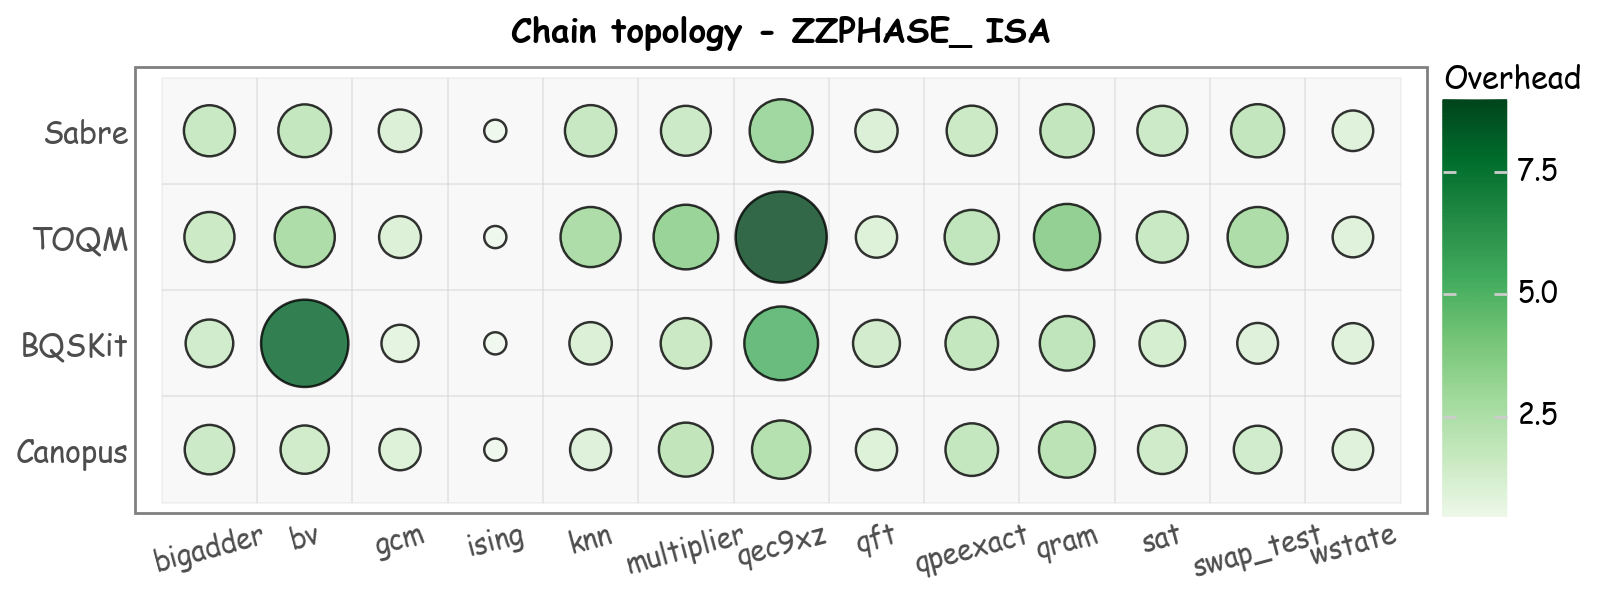

In [42]:
plot_bubbleheatmap_chart('chain', 'zzphase_', cost_metric='count')

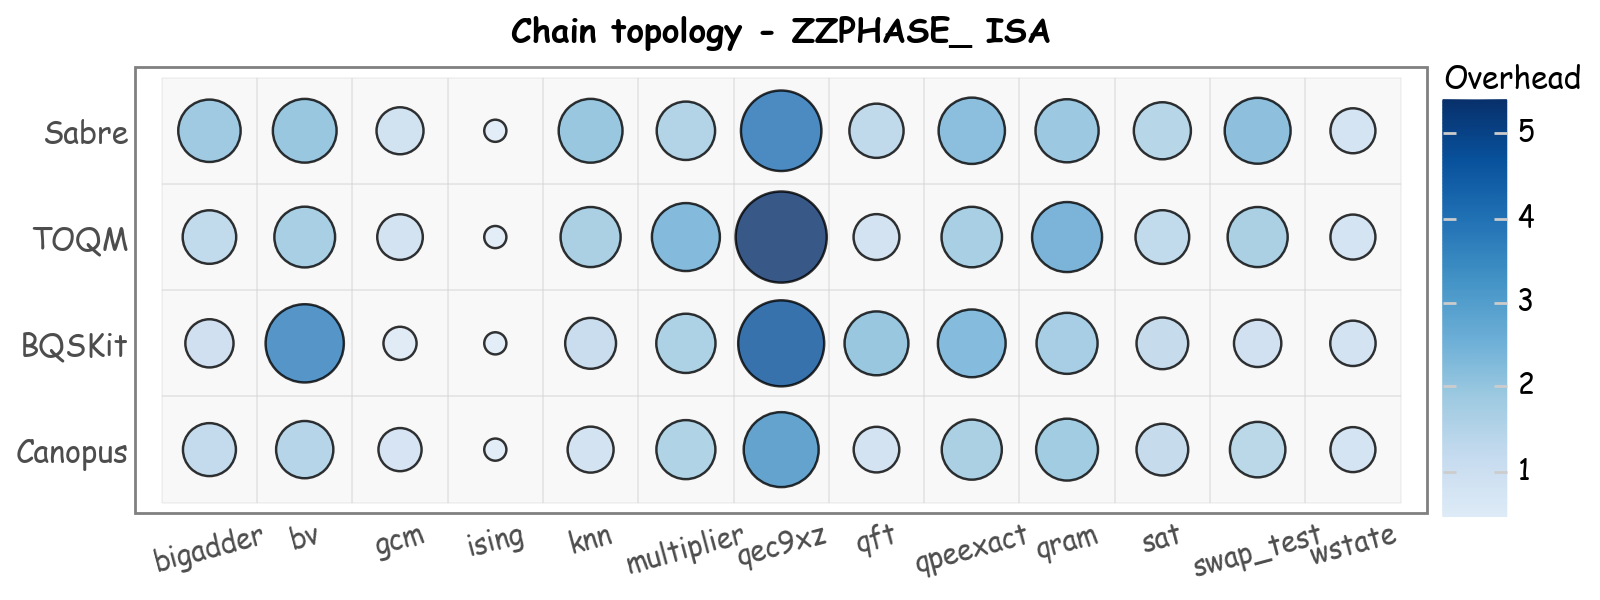

In [43]:
plot_bubbleheatmap_chart('chain', 'zzphase_', cost_metric='depth')

### Specific data tables about routing overhead (Count Cost)

In [50]:
programs = result_sabre_chain_depth['program']
programs = programs.replace('qec9xz', 'qec9').replace('swap_test', 'swapt').replace('multiplier', 'multi').replace('bigadder', 'bigadd').replace('qpeexact', 'qpe')
programs

0     bigadd
1         bv
2        gcm
3      ising
4        knn
5      multi
6       qec9
7        qft
8        qpe
9       qram
10       sat
11     swapt
12    wstate
Name: program, dtype: object

In [51]:
# Chain topology
comp_chain_cx_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['cx'], 'toqm': result_toqm_chain_count['cx'], 'bqskit': result_bqskit_chain_count['cx'], 'canopus': result_canopus_chain_count['cx']})
comp_chain_zzphase_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['zzphase'], 'toqm': result_toqm_chain_count['zzphase'], 'bqskit': result_bqskit_chain_count['zzphase'], 'canopus': result_canopus_chain_count['zzphase']})
comp_chain_sqisw_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['sqisw'], 'toqm': result_toqm_chain_count['sqisw'], 'bqskit': result_bqskit_chain_count['sqisw'], 'canopus': result_canopus_chain_count['sqisw']})
comp_chain_zzphase_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['zzphase_'], 'toqm': result_toqm_chain_count['zzphase_'], 'bqskit': result_bqskit_chain_count['zzphase_'], 'canopus': result_canopus_chain_count['zzphase_']})
comp_chain_sqisw_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['sqisw_'], 'toqm': result_toqm_chain_count['sqisw_'], 'bqskit': result_bqskit_chain_count['sqisw_'], 'canopus': result_canopus_chain_count['sqisw_']})
comp_chain_het_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_count['het'], 'toqm': result_toqm_chain_count['het'], 'bqskit': result_bqskit_chain_count['het'], 'canopus': result_canopus_chain_count['het']})

# HHex topology
comp_hhex_cx_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['cx'], 'toqm': result_toqm_hhex_count['cx'], 'bqskit': result_bqskit_hhex_count['cx'], 'canopus': result_canopus_hhex_count['cx']})
comp_hhex_zzphase_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['zzphase'], 'toqm': result_toqm_hhex_count['zzphase'], 'bqskit': result_bqskit_hhex_count['zzphase'], 'canopus': result_canopus_hhex_count['zzphase']})
comp_hhex_sqisw_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['sqisw'], 'toqm': result_toqm_hhex_count['sqisw'], 'bqskit': result_bqskit_hhex_count['sqisw'], 'canopus': result_canopus_hhex_count['sqisw']})
comp_hhex_zzphase_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['zzphase_'], 'toqm': result_toqm_hhex_count['zzphase_'], 'bqskit': result_bqskit_hhex_count['zzphase_'], 'canopus': result_canopus_hhex_count['zzphase_']})
comp_hhex_sqisw_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['sqisw_'], 'toqm': result_toqm_hhex_count['sqisw_'], 'bqskit': result_bqskit_hhex_count['sqisw_'], 'canopus': result_canopus_hhex_count['sqisw_']})
comp_hhex_het_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_count['het'], 'toqm': result_toqm_hhex_count['het'], 'bqskit': result_bqskit_hhex_count['het'], 'canopus': result_canopus_hhex_count['het']})

# Square topology
comp_square_cx_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['cx'], 'toqm': result_toqm_square_count['cx'], 'bqskit': result_bqskit_square_count['cx'], 'canopus': result_canopus_square_count['cx']})
comp_square_zzphase_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['zzphase'], 'toqm': result_toqm_square_count['zzphase'], 'bqskit': result_bqskit_square_count['zzphase'], 'canopus': result_canopus_square_count['zzphase']})
comp_square_sqisw_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['sqisw'], 'toqm': result_toqm_square_count['sqisw'], 'bqskit': result_bqskit_square_count['sqisw'], 'canopus': result_canopus_square_count['sqisw']})
comp_square_zzphase_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['zzphase_'], 'toqm': result_toqm_square_count['zzphase_'], 'bqskit': result_bqskit_square_count['zzphase_'], 'canopus': result_canopus_square_count['zzphase_']})
comp_square_sqisw_with_mirror_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['sqisw_'], 'toqm': result_toqm_square_count['sqisw_'], 'bqskit': result_bqskit_square_count['sqisw_'], 'canopus': result_canopus_square_count['sqisw_']})
comp_square_het_count = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_count['het'], 'toqm': result_toqm_square_count['het'], 'bqskit': result_bqskit_square_count['het'], 'canopus': result_canopus_square_count['het']})


In [85]:
comp_chain_count = pd.DataFrame({
    'program': programs,
    'sabre(cx)': result_sabre_chain_count['cx'],
    'toqm(cx)': result_toqm_chain_count['cx'],
    'bqskit(cx)': result_bqskit_chain_count['cx'],
    'canopus(cx)': result_canopus_chain_count['cx'],
    'sabre(zzphase)': result_sabre_chain_count['zzphase'],
    'toqm(zzphase)': result_toqm_chain_count['zzphase'],
    'bqskit(zzphase)': result_bqskit_chain_count['zzphase'],
    'canopus(zzphase)': result_canopus_chain_count['zzphase'],
    'sabre(sqisw)': result_sabre_chain_count['sqisw'],
    'toqm(sqisw)': result_toqm_chain_count['sqisw'],
    'bqskit(sqisw)': result_bqskit_chain_count['sqisw'],
    'canopus(sqisw)': result_canopus_chain_count['sqisw'],
    'sabre(zzphase_)': result_sabre_chain_count['zzphase_'],
    'toqm(zzphase_)': result_toqm_chain_count['zzphase_'],
    'bqskit(zzphase_)': result_bqskit_chain_count['zzphase_'],
    'canopus(zzphase_)': result_canopus_chain_count['zzphase_'],
    'sabre(sqisw_)': result_sabre_chain_count['sqisw_'],
    'toqm(sqisw_)': result_toqm_chain_count['sqisw_'],
    'bqskit(sqisw_)': result_bqskit_chain_count['sqisw_'],
    'canopus(sqisw_)': result_canopus_chain_count['sqisw_'],
    'sabre(het)': result_sabre_chain_count['het'],
    'toqm(het)': result_toqm_chain_count['het'],
    'bqskit(het)': result_bqskit_chain_count['het'],
    'canopus(het)': result_canopus_chain_count['het'],
})

comp_hhex_count = pd.DataFrame({
    'program': programs,
    'sabre(cx)': result_sabre_hhex_count['cx'],
    'toqm(cx)': result_toqm_hhex_count['cx'],
    'bqskit(cx)': result_bqskit_hhex_count['cx'],
    'canopus(cx)': result_canopus_hhex_count['cx'],
    'sabre(zzphase)': result_sabre_hhex_count['zzphase'],
    'toqm(zzphase)': result_toqm_hhex_count['zzphase'],
    'bqskit(zzphase)': result_bqskit_hhex_count['zzphase'],
    'canopus(zzphase)': result_canopus_hhex_count['zzphase'],
    'sabre(sqisw)': result_sabre_hhex_count['sqisw'],
    'toqm(sqisw)': result_toqm_hhex_count['sqisw'],
    'bqskit(sqisw)': result_bqskit_hhex_count['sqisw'],
    'canopus(sqisw)': result_canopus_hhex_count['sqisw'],
    'sabre(zzphase_)': result_sabre_hhex_count['zzphase_'],
    'toqm(zzphase_)': result_toqm_hhex_count['zzphase_'],
    'bqskit(zzphase_)': result_bqskit_hhex_count['zzphase_'],
    'canopus(zzphase_)': result_canopus_hhex_count['zzphase_'],
    'sabre(sqisw_)': result_sabre_hhex_count['sqisw_'],
    'toqm(sqisw_)': result_toqm_hhex_count['sqisw_'],
    'bqskit(sqisw_)': result_bqskit_hhex_count['sqisw_'],
    'canopus(sqisw_)': result_canopus_hhex_count['sqisw_'],
    'sabre(het)': result_sabre_hhex_count['het'],
    'toqm(het)': result_toqm_hhex_count['het'],
    'bqskit(het)': result_bqskit_hhex_count['het'],
    'canopus(het)': result_canopus_hhex_count['het'],
})

comp_square_count = pd.DataFrame({
    'program': programs,
    'sabre(cx)': result_sabre_square_count['cx'],
    'toqm(cx)': result_toqm_square_count['cx'],
    'bqskit(cx)': result_bqskit_square_count['cx'],
    'canopus(cx)': result_canopus_square_count['cx'],
    'sabre(zzphase)': result_sabre_square_count['zzphase'],
    'toqm(zzphase)': result_toqm_square_count['zzphase'],
    'bqskit(zzphase)': result_bqskit_square_count['zzphase'],
    'canopus(zzphase)': result_canopus_square_count['zzphase'],
    'sabre(sqisw)': result_sabre_square_count['sqisw'],
    'toqm(sqisw)': result_toqm_square_count['sqisw'],
    'bqskit(sqisw)': result_bqskit_square_count['sqisw'],
    'canopus(sqisw)': result_canopus_square_count['sqisw'],
    'sabre(zzphase_)': result_sabre_square_count['zzphase_'],
    'toqm(zzphase_)': result_toqm_square_count['zzphase_'],
    'bqskit(zzphase_)': result_bqskit_square_count['zzphase_'],
    'canopus(zzphase_)': result_canopus_square_count['zzphase_'],
    'sabre(sqisw_)': result_sabre_square_count['sqisw_'],
    'toqm(sqisw_)': result_toqm_square_count['sqisw_'],
    'bqskit(sqisw_)': result_bqskit_square_count['sqisw_'],
    'canopus(sqisw_)': result_canopus_square_count['sqisw_'],
    'sabre(het)': result_sabre_square_count['het'],
    'toqm(het)': result_toqm_square_count['het'],
    'bqskit(het)': result_bqskit_square_count['het'],
    'canopus(het)': result_canopus_square_count['het'],
})

In [86]:
COMPILERS = ['sabre', 'toqm', 'bqskit', 'canopus']

def filter_vf2layout(result):
    return result[~(result['cx'] <= 1)]

def get_avg(col):
    return gmean([val for val in col if val > 1])
    
avg_comp_chain_count = []
avg_comp_hhex_count = []
avg_comp_square_count = []
for isa in ISA_TYPES:
    for compiler in COMPILERS:
        avg_comp_chain_count.append(get_avg(comp_chain_count[f'{compiler}({isa})']))
        avg_comp_hhex_count.append(get_avg(comp_hhex_count[f'{compiler}({isa})']))
        avg_comp_square_count.append(get_avg(comp_square_count[f'{compiler}({isa})']))

comp_chain_count.loc[len(comp_chain_count)] = ['avg'] + avg_comp_chain_count
comp_hhex_count.loc[len(comp_hhex_count)] = ['avg'] + avg_comp_hhex_count
comp_square_count.loc[len(comp_square_count)] = ['avg'] + avg_comp_square_count

comp_chain_count.to_latex('../tables/comp_chain_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|')
comp_hhex_count.to_latex('../tables/comp_hhex_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|')
comp_square_count.to_latex('../tables/comp_square_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|')

In [84]:
comp_chain_count

,program,sabre(cx),toqm(cx),bqskit(cx),canopus(cx),sabre(zzphase),toqm(zzphase),bqskit(zzphase),canopus(zzphase),sabre(sqisw),...,bqskit(zzphase_),canopus(zzphase_),sabre(sqisw_),toqm(sqisw_),bqskit(sqisw_),canopus(sqisw_),sabre(het),toqm(het),bqskit(het),canopus(het)
0,bigadd,2.530769,2.438462,1.592308,2.169231,2.353846,2.261538,1.534615,2.123077,2.394231,...,1.565385,1.739744,1.942308,1.850000,1.494231,1.569231,1.946154,1.846154,1.305769,1.805769
1,bv,2.666667,4.055556,10.944444,2.444444,2.666667,4.055556,10.944444,2.333333,2.375000,...,8.120370,1.629630,2.027778,2.888889,7.222222,1.833333,2.125000,3.069444,7.763889,1.791667
2,gcm,1.681018,1.600783,0.953033,1.442270,1.369211,1.293216,0.549250,1.218852,1.526419,...,0.790444,1.048761,1.294521,1.242661,0.747065,1.136986,1.154599,1.105023,0.669928,1.048434
3,ising,1.000000,1.000000,1.000000,1.000000,0.383333,0.383333,0.383333,0.383333,0.750000,...,0.383333,0.383333,0.750000,0.750000,0.750000,0.750000,0.383333,0.383333,0.383333,0.383333
4,knn,2.595238,4.023810,1.476190,1.285714,2.404762,3.928571,1.220238,1.226190,2.428571,...,1.129960,1.035714,1.976190,2.904762,1.062500,1.071429,1.982143,3.113095,1.006944,1.142857
5,multi,2.319820,4.968468,2.531532,2.680180,2.184685,4.831081,2.282282,2.504505,2.260135,...,1.839339,2.229354,1.806306,3.556306,1.726351,2.036036,1.825450,3.782658,1.684309,2.193694
6,qec9,4.437500,12.343750,6.875000,3.562500,4.437500,12.343750,5.333333,3.562500,3.890625,...,5.231771,2.770833,3.250000,8.453125,3.976562,2.562500,3.515625,9.343750,4.273437,2.984375
7,qft,1.741830,1.500000,1.777778,1.490196,1.510349,1.453159,2.017974,1.450436,1.306373,...,1.497277,1.047658,1.187908,1.001634,1.321895,0.995098,1.162582,1.103486,1.410675,1.096133
8,qpe,2.773077,3.319231,3.153846,2.957692,2.457692,3.094231,2.885897,2.757692,2.079808,...,2.071795,2.071474,1.886538,2.238462,2.126923,1.996154,1.886218,2.358654,2.350641,2.091987
9,qram,2.938462,5.369231,2.753846,3.253846,2.746154,5.207692,2.730769,3.076923,2.630769,...,2.291667,2.482692,2.188462,3.800000,2.223077,2.365385,2.221154,4.061538,2.257051,2.471154


In [73]:
comp_chain_count

,program,sabre(cx),toqm(cx),bqskit(cx),canopus(cx),sabre(zzphase),toqm(zzphase),bqskit(zzphase),canopus(zzphase),sabre(sqisw),...,canopus(zzphase_),sabre(sqisw_),toqm(sqisw_),bqskit(sqisw_),canopus(sqisw_),sabre(het),toqm(het),bqskit(het),canopus(het),13
0,bigadd,2.530769,2.438462,1.592308,2.169231,2.353846,2.261538,1.534615,2.123077,2.394231,...,1.739744,1.942308,1.850000,1.494231,1.569231,1.946154,1.846154,1.305769,1.805769,1
1,bv,2.666667,4.055556,10.944444,2.444444,2.666667,4.055556,10.944444,2.333333,2.375000,...,1.629630,2.027778,2.888889,7.222222,1.833333,2.125000,3.069444,7.763889,1.791667,1
2,gcm,1.681018,1.600783,0.953033,1.442270,1.369211,1.293216,0.549250,1.218852,1.526419,...,1.048761,1.294521,1.242661,0.747065,1.136986,1.154599,1.105023,0.669928,1.048434,1
3,ising,1.000000,1.000000,1.000000,1.000000,0.383333,0.383333,0.383333,0.383333,0.750000,...,0.383333,0.750000,0.750000,0.750000,0.750000,0.383333,0.383333,0.383333,0.383333,1
4,knn,2.595238,4.023810,1.476190,1.285714,2.404762,3.928571,1.220238,1.226190,2.428571,...,1.035714,1.976190,2.904762,1.062500,1.071429,1.982143,3.113095,1.006944,1.142857,1
5,multi,2.319820,4.968468,2.531532,2.680180,2.184685,4.831081,2.282282,2.504505,2.260135,...,2.229354,1.806306,3.556306,1.726351,2.036036,1.825450,3.782658,1.684309,2.193694,1
6,qec9,4.437500,12.343750,6.875000,3.562500,4.437500,12.343750,5.333333,3.562500,3.890625,...,2.770833,3.250000,8.453125,3.976562,2.562500,3.515625,9.343750,4.273437,2.984375,1
7,qft,1.741830,1.500000,1.777778,1.490196,1.510349,1.453159,2.017974,1.450436,1.306373,...,1.047658,1.187908,1.001634,1.321895,0.995098,1.162582,1.103486,1.410675,1.096133,1
8,qpe,2.773077,3.319231,3.153846,2.957692,2.457692,3.094231,2.885897,2.757692,2.079808,...,2.071474,1.886538,2.238462,2.126923,1.996154,1.886218,2.358654,2.350641,2.091987,1
9,qram,2.938462,5.369231,2.753846,3.253846,2.746154,5.207692,2.730769,3.076923,2.630769,...,2.482692,2.188462,3.800000,2.223077,2.365385,2.221154,4.061538,2.257051,2.471154,1


In [ ]:
# def convert_digit(x):
#     x_amp = x * 10
#     x_amp = (x_amp - 10) * 1.5 + 10
#     if x_amp < 10:
#         x_amp = 10
#     if x_amp > 90:
#         x_amp = 90
#     return f"{x:.2f}" + r"\cellcolor{brown!" + f"{x_amp :.2f}" + "}"


# for compiler in COMPILERS:
#     comp_chain_cx_count[compiler] = comp_chain_cx_count[compiler].map(lambda x: convert_digit(x))
#     comp_chain_zzphase_count[compiler] = comp_chain_zzphase_count[compiler].map(lambda x: convert_digit(x))
#     comp_chain_sqisw_count[compiler] = comp_chain_sqisw_count[compiler].map(lambda x: convert_digit(x))
#     comp_chain_sqisw_with_mirror_count[compiler] = comp_chain_sqisw_with_mirror_count[compiler].map(lambda x: convert_digit(x))
#     comp_chain_zzphase_with_mirror_count[compiler] = comp_chain_zzphase_with_mirror_count[compiler].map(lambda x: convert_digit(x))
#     comp_chain_het_count[compiler] = comp_chain_het_count[compiler].map(lambda x: convert_digit(x))

comp_chain_cx_count.to_latex('../tables/comp_chain_cx_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_zzphase_count.to_latex('../tables/comp_chain_zzphase_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_sqisw_count.to_latex('../tables/comp_chain_sqisw_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_zzphase_with_mirror_count.to_latex('../tables/comp_chain_zzphase_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_sqisw_with_mirror_count.to_latex('../tables/comp_chain_sqisw_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_het_count.to_latex('../tables/comp_chain_het_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')

comp_hhex_cx_count.to_latex('../tables/comp_hhex_cx_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_zzphase_count.to_latex('../tables/comp_hhex_zzphase_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_sqisw_count.to_latex('../tables/comp_hhex_sqisw_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_zzphase_with_mirror_count.to_latex('../tables/comp_hhex_zzphase_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_sqisw_with_mirror_count.to_latex('../tables/comp_hhex_sqisw_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_het_count.to_latex('../tables/comp_hhex_het_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')

comp_square_cx_count.to_latex('../tables/comp_square_cx_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_zzphase_count.to_latex('../tables/comp_square_zzphase_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_sqisw_count.to_latex('../tables/comp_square_sqisw_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_zzphase_with_mirror_count.to_latex('../tables/comp_square_zzphase_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_sqisw_with_mirror_count.to_latex('../tables/comp_square_sqisw_with_mirror_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_het_count.to_latex('../tables/comp_square_het_count.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')

In [12]:
COMPILERS = ['sabre', 'toqm', 'bqskit', 'canopus']


In [13]:
comp_chain_cx_count

In [ ]:
def filter_vf2layout(result):
    return result[~(result['cx'] <= 1)]

def get_avg(col):
    return gmean([val for val in col if val > 1])

colors = ['\cellcolor{brown!10}', '\cellcolor{brown!20}', '\cellcolor{brown!30}', '\cellcolor{brown!40}']

def get_arr_rank(arr):
    sorted_indices = np.argsort(arr)
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(1, len(arr)+1)
    return ranks - 1

def process_val_list(l):
    vals = np.round(l, 2)
    ranks = get_arr_rank(vals)
    return [str(val) + colors[rank] for val, rank in zip(vals, ranks)]


comp_chain_cx_count_avg = process_val_list([get_avg(comp_chain_cx_count[compiler]) for compiler in COMPILERS])
comp_chain_zzphase_count_avg = process_val_list([get_avg(comp_chain_zzphase_count[compiler]) for compiler in COMPILERS])
comp_chain_sqisw_count_avg = process_val_list([get_avg(comp_chain_sqisw_count[compiler]) for compiler in COMPILERS])
comp_chain_zzphase_with_mirror_count_avg = process_val_list([get_avg(comp_chain_zzphase_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_chain_sqisw_with_mirror_count_avg = process_val_list([get_avg(comp_chain_sqisw_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_chain_het_count_avg = process_val_list([get_avg(comp_chain_het_count[compiler]) for compiler in COMPILERS])

comp_hhex_cx_count_avg = process_val_list([get_avg(comp_hhex_cx_count[compiler]) for compiler in COMPILERS])
comp_hhex_zzphase_count_avg = process_val_list([get_avg(comp_hhex_zzphase_count[compiler]) for compiler in COMPILERS])
comp_hhex_sqisw_count_avg = process_val_list([get_avg(comp_hhex_sqisw_count[compiler]) for compiler in COMPILERS])
comp_hhex_zzphase_with_mirror_count_avg = process_val_list([get_avg(comp_hhex_zzphase_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_hhex_sqisw_with_mirror_count_avg = process_val_list([get_avg(comp_hhex_sqisw_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_hhex_het_count_avg = process_val_list([get_avg(comp_hhex_het_count[compiler]) for compiler in COMPILERS])

comp_square_cx_count_avg = process_val_list([get_avg(comp_square_cx_count[compiler]) for compiler in COMPILERS])
comp_square_zzphase_count_avg = process_val_list([get_avg(comp_square_zzphase_count[compiler]) for compiler in COMPILERS])
comp_square_sqisw_count_avg = process_val_list([get_avg(comp_square_sqisw_count[compiler]) for compiler in COMPILERS])
comp_square_zzphase_with_mirror_count_avg = process_val_list([get_avg(comp_square_zzphase_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_square_sqisw_with_mirror_count_avg = process_val_list([get_avg(comp_square_sqisw_with_mirror_count[compiler]) for compiler in COMPILERS])
comp_square_het_count_avg = process_val_list([get_avg(comp_square_het_count[compiler]) for compiler in COMPILERS])

# print('Chain avg CX count cost:', comp_chain_cx_count_avg)
# print('Chain avg ZZPhase count cost:', comp_chain_zzphase_count_avg)
# print('Chain avg SQISW count cost:', comp_chain_sqisw_count_avg)
# print('Chain avg ZZPhase with mirror count cost:', comp_chain_zzphase_with_mirror_count_avg)
# print('Chain avg SQISW with mirror count cost:', comp_chain_sqisw_with_mirror_count_avg)
# print('Chain avg HET count cost:', comp_chain_het_count_avg)
print('Chain topology')
print(' & '.join(comp_chain_cx_count_avg + comp_chain_zzphase_count_avg + comp_chain_sqisw_count_avg + comp_chain_zzphase_with_mirror_count_avg + comp_chain_sqisw_with_mirror_count_avg + comp_chain_het_count_avg))

print('HHex topology')
print(' & '.join(comp_hhex_cx_count_avg + comp_hhex_zzphase_count_avg + comp_hhex_sqisw_count_avg + comp_hhex_zzphase_with_mirror_count_avg + comp_hhex_sqisw_with_mirror_count_avg + comp_hhex_het_count_avg))

print('Square topology')
print(' & '.join(comp_square_cx_count_avg + comp_square_zzphase_count_avg + comp_square_sqisw_count_avg + comp_square_zzphase_with_mirror_count_avg + comp_square_sqisw_with_mirror_count_avg + comp_square_het_count_avg))


### Specific data tables about routing overhead (Depth Cost)

In [ ]:
# Chain topology
comp_chain_cx_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['cx'], 'toqm': result_toqm_chain_depth['cx'], 'bqskit': result_bqskit_chain_depth['cx'], 'canopus': result_canopus_chain_depth['cx']})
comp_chain_zzphase_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['zzphase'], 'toqm': result_toqm_chain_depth['zzphase'], 'bqskit': result_bqskit_chain_depth['zzphase'], 'canopus': result_canopus_chain_depth['zzphase']})
comp_chain_sqisw_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['sqisw'], 'toqm': result_toqm_chain_depth['sqisw'], 'bqskit': result_bqskit_chain_depth['sqisw'], 'canopus': result_canopus_chain_depth['sqisw']})
comp_chain_zzphase_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['zzphase_'], 'toqm': result_toqm_chain_depth['zzphase_'], 'bqskit': result_bqskit_chain_depth['zzphase_'], 'canopus': result_canopus_chain_depth['zzphase_']})
comp_chain_sqisw_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['sqisw_'], 'toqm': result_toqm_chain_depth['sqisw_'], 'bqskit': result_bqskit_chain_depth['sqisw_'], 'canopus': result_canopus_chain_depth['sqisw_']})
comp_chain_het_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_chain_depth['het'], 'toqm': result_toqm_chain_depth['het'], 'bqskit': result_bqskit_chain_depth['het'], 'canopus': result_canopus_chain_depth['het']})

# HHex topology
comp_hhex_cx_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['cx'], 'toqm': result_toqm_hhex_depth['cx'], 'bqskit': result_bqskit_hhex_depth['cx'], 'canopus': result_canopus_hhex_depth['cx']})
comp_hhex_zzphase_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['zzphase'], 'toqm': result_toqm_hhex_depth['zzphase'], 'bqskit': result_bqskit_hhex_depth['zzphase'], 'canopus': result_canopus_hhex_depth['zzphase']})
comp_hhex_sqisw_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['sqisw'], 'toqm': result_toqm_hhex_depth['sqisw'], 'bqskit': result_bqskit_hhex_depth['sqisw'], 'canopus': result_canopus_hhex_depth['sqisw']})
comp_hhex_zzphase_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['zzphase_'], 'toqm': result_toqm_hhex_depth['zzphase_'], 'bqskit': result_bqskit_hhex_depth['zzphase_'], 'canopus': result_canopus_hhex_depth['zzphase_']})
comp_hhex_sqisw_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['sqisw_'], 'toqm': result_toqm_hhex_depth['sqisw_'], 'bqskit': result_bqskit_hhex_depth['sqisw_'], 'canopus': result_canopus_hhex_depth['sqisw_']})
comp_hhex_het_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_hhex_depth['het'], 'toqm': result_toqm_hhex_depth['het'], 'bqskit': result_bqskit_hhex_depth['het'], 'canopus': result_canopus_hhex_depth['het']})

# Square topology
comp_square_cx_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['cx'], 'toqm': result_toqm_square_depth['cx'], 'bqskit': result_bqskit_square_depth['cx'], 'canopus': result_canopus_square_depth['cx']})
comp_square_zzphase_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['zzphase'], 'toqm': result_toqm_square_depth['zzphase'], 'bqskit': result_bqskit_square_depth['zzphase'], 'canopus': result_canopus_square_depth['zzphase']})
comp_square_sqisw_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['sqisw'], 'toqm': result_toqm_square_depth['sqisw'], 'bqskit': result_bqskit_square_depth['sqisw'], 'canopus': result_canopus_square_depth['sqisw']})
comp_square_zzphase_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['zzphase_'], 'toqm': result_toqm_square_depth['zzphase_'], 'bqskit': result_bqskit_square_depth['zzphase_'], 'canopus': result_canopus_square_depth['zzphase_']})
comp_square_sqisw_with_mirror_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['sqisw_'], 'toqm': result_toqm_square_depth['sqisw_'], 'bqskit': result_bqskit_square_depth['sqisw_'], 'canopus': result_canopus_square_depth['sqisw_']})
comp_square_het_depth = pd.DataFrame({'program': programs, 'sabre': result_sabre_square_depth['het'], 'toqm': result_toqm_square_depth['het'], 'bqskit': result_bqskit_square_depth['het'], 'canopus': result_canopus_square_depth['het']})


In [ ]:
comp_chain_cx_depth.to_latex('../tables/comp_chain_cx_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_zzphase_depth.to_latex('../tables/comp_chain_zzphase_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_sqisw_depth.to_latex('../tables/comp_chain_sqisw_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_zzphase_with_mirror_depth.to_latex('../tables/comp_chain_zzphase_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_sqisw_with_mirror_depth.to_latex('../tables/comp_chain_sqisw_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_chain_het_depth.to_latex('../tables/comp_chain_het_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')

comp_hhex_cx_depth.to_latex('../tables/comp_hhex_cx_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_zzphase_depth.to_latex('../tables/comp_hhex_zzphase_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_sqisw_depth.to_latex('../tables/comp_hhex_sqisw_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_zzphase_with_mirror_depth.to_latex('../tables/comp_hhex_zzphase_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_sqisw_with_mirror_depth.to_latex('../tables/comp_hhex_sqisw_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_hhex_het_depth.to_latex('../tables/comp_hhex_het_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')

comp_square_cx_depth.to_latex('../tables/comp_square_cx_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_zzphase_depth.to_latex('../tables/comp_square_zzphase_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_sqisw_depth.to_latex('../tables/comp_square_sqisw_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_zzphase_with_mirror_depth.to_latex('../tables/comp_square_zzphase_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_sqisw_with_mirror_depth.to_latex('../tables/comp_square_sqisw_with_mirror_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')
comp_square_het_depth.to_latex('../tables/comp_square_het_depth.tex', index=False, escape=False, float_format='%.2f', column_format='|l|r|r|r|r|')


In [ ]:
[comp_chain_cx_depth, comp_chain_zzphase_depth, comp_chain_sqisw_depth, comp_chain_zzphase_with_mirror_depth, comp_chain_sqisw_with_mirror_depth, comp_chain_het_depth]
[comp_hhex_cx_depth, comp_hhex_zzphase_depth, comp_hhex_sqisw_depth, comp_hhex_zzphase_with_mirror_depth, comp_hhex_sqisw_with_mirror_depth, comp_hhex_het_depth]
[comp_square_cx_depth, comp_square_zzphase_depth, comp_square_sqisw_depth, comp_square_zzphase_with_mirror_depth, comp_square_sqisw_with_mirror_depth, comp_square_het_depth]

In [ ]:
comp_chain_cx_depth_avg = process_val_list([get_avg(comp_chain_cx_depth[compiler]) for compiler in COMPILERS])
comp_chain_zzphase_depth_avg = process_val_list([get_avg(comp_chain_zzphase_depth[compiler]) for compiler in COMPILERS])
comp_chain_sqisw_depth_avg = process_val_list([get_avg(comp_chain_sqisw_depth[compiler]) for compiler in COMPILERS])
comp_chain_zzphase_with_mirror_depth_avg = process_val_list([get_avg(comp_chain_zzphase_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_chain_sqisw_with_mirror_depth_avg = process_val_list([get_avg(comp_chain_sqisw_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_chain_het_depth_avg = process_val_list([get_avg(comp_chain_het_depth[compiler]) for compiler in COMPILERS])

comp_hhex_cx_depth_avg = process_val_list([get_avg(comp_hhex_cx_depth[compiler]) for compiler in COMPILERS])
comp_hhex_zzphase_depth_avg = process_val_list([get_avg(comp_hhex_zzphase_depth[compiler]) for compiler in COMPILERS])
comp_hhex_sqisw_depth_avg = process_val_list([get_avg(comp_hhex_sqisw_depth[compiler]) for compiler in COMPILERS])
comp_hhex_zzphase_with_mirror_depth_avg = process_val_list([get_avg(comp_hhex_zzphase_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_hhex_sqisw_with_mirror_depth_avg = process_val_list([get_avg(comp_hhex_sqisw_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_hhex_het_depth_avg = process_val_list([get_avg(comp_hhex_het_depth[compiler]) for compiler in COMPILERS])

comp_square_cx_depth_avg = process_val_list([get_avg(comp_square_cx_depth[compiler]) for compiler in COMPILERS])
comp_square_zzphase_depth_avg = process_val_list([get_avg(comp_square_zzphase_depth[compiler]) for compiler in COMPILERS])
comp_square_sqisw_depth_avg = process_val_list([get_avg(comp_square_sqisw_depth[compiler]) for compiler in COMPILERS])
comp_square_zzphase_with_mirror_depth_avg = process_val_list([get_avg(comp_square_zzphase_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_square_sqisw_with_mirror_depth_avg = process_val_list([get_avg(comp_square_sqisw_with_mirror_depth[compiler]) for compiler in COMPILERS])
comp_square_het_depth_avg = process_val_list([get_avg(comp_square_het_depth[compiler]) for compiler in COMPILERS])


print('Chain topology')
print(' & '.join(comp_chain_cx_depth_avg + comp_chain_zzphase_depth_avg + comp_chain_sqisw_depth_avg + comp_chain_zzphase_with_mirror_depth_avg + comp_chain_sqisw_with_mirror_depth_avg + comp_chain_het_depth_avg))

print('HHex topology')
print(' & '.join(comp_hhex_cx_depth_avg + comp_hhex_zzphase_depth_avg + comp_hhex_sqisw_depth_avg + comp_hhex_zzphase_with_mirror_depth_avg + comp_hhex_sqisw_with_mirror_depth_avg + comp_hhex_het_depth_avg))

print('Square topology')
print(' & '.join(comp_square_cx_depth_avg + comp_square_zzphase_depth_avg + comp_square_sqisw_depth_avg + comp_square_zzphase_with_mirror_depth_avg + comp_square_sqisw_with_mirror_depth_avg + comp_square_het_depth_avg))


### Average routing results $C_\mathrm{count}$

In [ ]:
def filter_vf2layout(result):
    return result[~(result['cx'] <= 1)]

result_sabre_chain = filter_vf2layout(pd.read_csv('../results/sabre-chain-count.csv'))
result_canopus_chain = filter_vf2layout(pd.read_csv('../results/canopus-chain-count.csv'))
result_toqm_chain = filter_vf2layout(pd.read_csv('../results/toqm-chain-count.csv'))
result_bqskit_chain = filter_vf2layout(pd.read_csv('../results/bqskit-chain-count.csv'))

result_sabre_hhex = filter_vf2layout(pd.read_csv('../results/sabre-hhex-count.csv'))
result_canopus_hhex = filter_vf2layout(pd.read_csv('../results/canopus-hhex-count.csv'))
result_toqm_hhex = filter_vf2layout(pd.read_csv('../results/toqm-hhex-count.csv'))
result_bqskit_hhex = filter_vf2layout(pd.read_csv('../results/bqskit-hhex-count.csv'))

result_sabre_square = filter_vf2layout(pd.read_csv('../results/sabre-square-count.csv'))
result_canopus_square = filter_vf2layout(pd.read_csv('../results/canopus-square-count.csv'))
result_toqm_square = filter_vf2layout(pd.read_csv('../results/toqm-square-count.csv'))
result_bqskit_square = filter_vf2layout(pd.read_csv('../results/bqskit-square-count.csv'))

ISA_TYPES = ['cx', 'zzphase', 'sqisw', 'zzphase_', 'sqisw_', 'het']

In [ ]:
result = pd.DataFrame(columns=[
    'Topology', 'Sabre(cx)', 'TOQM(cx)', 'BQSKit(cx)', 'Canopus(cx)',
    'Sabre(zzphase)', 'TOQM(zzphase)', 'BQSKit(zzphase)', 'Canopus(zzphase)',
    'Sabre(sqisw)', 'TOQM(sqisw)', 'BQSKit(sqisw)', 'Canopus(sqisw)',
    'Sabre(zzphase_)', 'TOQM(zzphase_)',
    'BQSKit(zzphase_)', 'Canopus(zzphase_)',
    'Sabre(sqisw_)', 'TOQM(sqisw_)',
    'BQSKit(sqisw_)', 'Canopus(sqisw_)',
    'Sabre(het)', 'TOQM(het)',
    'BQSKit(het)', 'Canopus(het)'
])

result = pd.DataFrame({
    'Topology': ['Chain', 'HHex', 'Square'],
    'Sabre (cx)': [gmean(result_sabre_chain['cx']), gmean(result_sabre_hhex['cx']), gmean(result_sabre_square['cx'])],
    'TOQM (cx)': [gmean(result_toqm_chain['cx']), gmean(result_toqm_hhex['cx']), gmean(result_toqm_square['cx'])],
    'BQSKit (cx)': [gmean(result_bqskit_chain['cx']), gmean(result_bqskit_hhex['cx']), gmean(result_bqskit_square['cx'])],
    'Canopus (cx)': [gmean(result_canopus_chain['cx']), gmean(result_canopus_hhex['cx']), gmean(result_canopus_square['cx'])],

    'Sabre (zzphase)': [gmean(result_sabre_chain['zzphase']), gmean(result_sabre_hhex['zzphase']), gmean(result_sabre_square['zzphase'])],
    'TOQM (zzphase)': [gmean(result_toqm_chain['zzphase']), gmean(result_toqm_hhex['zzphase']), gmean(result_toqm_square['zzphase'])],
    'BQSKit (zzphase)': [gmean(result_bqskit_chain['zzphase']), gmean(result_bqskit_hhex['zzphase']), gmean(result_bqskit_square['zzphase'])],
    'Canopus (zzphase)': [gmean(result_canopus_chain['zzphase']), gmean(result_canopus_hhex['zzphase']), gmean(result_canopus_square['zzphase'])],
    
    'Sabre (sqisw)': [gmean(result_sabre_chain['sqisw']), gmean(result_sabre_hhex['sqisw']), gmean(result_sabre_square['sqisw'])],
    'TOQM (sqisw)': [gmean(result_toqm_chain['sqisw']), gmean(result_toqm_hhex['sqisw']), gmean(result_toqm_square['sqisw'])],
    'BQSKit (sqisw)': [gmean(result_bqskit_chain['sqisw']), gmean(result_bqskit_hhex['sqisw']), gmean(result_bqskit_square['sqisw'])],
    'Canopus (sqisw)': [gmean(result_canopus_chain['sqisw']), gmean(result_canopus_hhex['sqisw']), gmean(result_canopus_square['sqisw'])],

    'Sabre (zzphase_)': [gmean(result_sabre_chain['zzphase_']), gmean(result_sabre_hhex['zzphase_']), gmean(result_sabre_square['zzphase_'])],
    'TOQM (zzphase_)': [gmean(result_toqm_chain['zzphase_']), gmean(result_toqm_hhex['zzphase_']), gmean(result_toqm_square['zzphase_'])],
    'BQSKit (zzphase_)': [gmean(result_bqskit_chain['zzphase_']), gmean(result_bqskit_hhex['zzphase_']), gmean(result_bqskit_square['zzphase_'])],
    'Canopus (zzphase_)': [gmean(result_canopus_chain['zzphase_']), gmean(result_canopus_hhex['zzphase_']), gmean(result_canopus_square['zzphase_'])],

    'Sabre (sqisw_)': [gmean(result_sabre_chain['sqisw_']), gmean(result_sabre_hhex['sqisw_']), gmean(result_sabre_square['sqisw_'])],
    'TOQM (sqisw_)': [gmean(result_toqm_chain['sqisw_']), gmean(result_toqm_hhex['sqisw_']), gmean(result_toqm_square['sqisw_'])],
    'BQSKit (sqisw_)': [gmean(result_bqskit_chain['sqisw_']), gmean(result_bqskit_hhex['sqisw_']), gmean(result_bqskit_square['sqisw_'])],
    'Canopus (sqisw_)': [gmean(result_canopus_chain['sqisw_']), gmean(result_canopus_hhex['sqisw_']), gmean(result_canopus_square['sqisw_'])],

    'Sabre (het)': [gmean(result_sabre_chain['het']), gmean(result_sabre_hhex['het']), gmean(result_sabre_square['het'])],
    'TOQM (het)': [gmean(result_toqm_chain['het']), gmean(result_toqm_hhex['het']), gmean(result_toqm_square['het'])],
    'BQSKit (het)': [gmean(result_bqskit_chain['het']), gmean(result_bqskit_hhex['het']), gmean(result_bqskit_square['het'])],
    'Canopus (het)': [gmean(result_canopus_chain['het']), gmean(result_canopus_hhex['het']), gmean(result_canopus_square['het'])]
})



In [ ]:
part1_columns = ['Topology'] + [f'{compiler} (cx)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']] + [f'{compiler} (zzphase)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']]
part2_columns = ['Topology'] + [f'{compiler} (sqisw)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']] + [f'{compiler} (zzphase_)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']]
part3_columns = ['Topology'] + [f'{compiler} (sqisw_)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']] + [f'{compiler} (het)' for compiler in ['Sabre', 'TOQM', 'BQSKit', 'Canopus']]


result[part1_columns].to_latex('result_table_part1.tex', 
                index=False, escape=False, 
                float_format='%.2f', column_format='|l|' + 'r|' * (len(result.columns) - 1))
result[part2_columns].to_latex('result_table_part2.tex', 
                index=False, escape=False, 
                float_format='%.2f', column_format='|l|' + 'r|' * (len(result.columns) - 1))
result[part3_columns].to_latex('result_table_part3.tex', 
                index=False, escape=False, 
                float_format='%.2f', column_format='|l|' + 'r|' * (len(result.columns) - 1))

